In [3]:
import sys
sys.path.append("..")

import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.feature_selection import SelectPercentile, f_classif

In [4]:
dt.get_data_description()


 NHBE
|--healthy
|  |--Series1
|  |--Series9
|--sars-cov2
|  |--Series1
|--iav
|  |--Series9
|--iavdns1
|  |--Series9
|--ifnb_treated
|  |--Series9

 A549
|--healthy
|  |--Series2
|  |--Series3
|  |--Series4
|  |--Series5
|  |--Series8
|--sars-cov2
|  |--Series2
|  |--Series5
|--iav
|  |--Series4
|--rsv
|  |--Series3
|--hpiv3
|  |--Series8
|--healthy_ace2
|  |--Series6
|  |--Series16
|--sars-cov2_ace2
|  |--Series6
|  |--Series16
|--sars-cov2_ace2_rux
|  |--Series16

 Calu3
|--healthy
|  |--Series7
|--sars-cov2
|  |--Series7

 biopsy
|--healthy
|  |--Series15
|--sars-cov2
|  |--Series15


# Gene Selection using p-values

In [5]:
colLabels = []
i = 0

colstmp = dt.get_columns('NHBE', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols = colstmp

colstmp = dt.get_columns('NHBE', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('NHBE', 'iav')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('NHBE', 'iavdns1')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


colstmp = dt.get_columns('A549', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('A549', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('A549', 'iav')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('A549', 'rsv')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('A549', 'hpiv3')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


colstmp = dt.get_columns('Calu3', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('Calu3', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


colstmp = dt.get_columns('biopsy', 'healthy')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp

colstmp = dt.get_columns('biopsy', 'sars-cov2')
colLabels += [i] * len(colstmp)
i += 1
cols += colstmp


path = "C:\\Users\\Pedro\\Desktop\\bicpams_5.1\\data\\latecovid\\"

In [6]:
pairs = [
    [dt.get_columns('NHBE', 'healthy', series = [1]),
     dt.get_columns('NHBE', 'sars-cov2', series = [1])],
    [dt.get_columns('NHBE', 'healthy', series = [9]),
     dt.get_columns('NHBE', 'iav', series = [9])],
    [dt.get_columns('NHBE', 'healthy', series = [9]),
     dt.get_columns('NHBE', 'iavdns1', series = [9])],
    
    [dt.get_columns('A549', 'healthy', series = [2, 5]),
     dt.get_columns('A549', 'sars-cov2', series = [2, 5])],
    [dt.get_columns('A549', 'healthy', series = [4]),
     dt.get_columns('A549', 'iav', series = [4])],
    [dt.get_columns('A549', 'healthy', series = [3]),
     dt.get_columns('A549', 'rsv', series = [3])],
    [dt.get_columns('A549', 'healthy', series = [8]),
     dt.get_columns('A549', 'hpiv3', series = [8])],
    
    [dt.get_columns('Calu3', 'healthy', series = [7]),
     dt.get_columns('Calu3', 'sars-cov2', series = [7])],
    
    [dt.get_columns('biopsy', 'healthy', series = [15]),
     dt.get_columns('biopsy', 'sars-cov2', series = [15])],
]

In [7]:
data = dt.get_complete_data()[cols]
data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series9_NHBE_Mock_1,Series9_NHBE_Mock_2,Series9_NHBE_Mock_3,Series9_NHBE_Mock_4,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,...,Series7_Calu3_Mock_1,Series7_Calu3_Mock_2,Series7_Calu3_Mock_3,Series7_Calu3_SARS-CoV-2_1,Series7_Calu3_SARS-CoV-2_2,Series7_Calu3_SARS-CoV-2_3,Series15_HealthyLungBiopsy_2,Series15_HealthyLungBiopsy_1,Series15_COVID19Lung_2,Series15_COVID19Lung_1
DDX11L1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WASH7P,3.401197,3.218876,3.178054,4.060443,4.077537,3.988984,4.499810,3.555348,2.995732,3.806662,...,3.258097,4.110874,4.442651,3.871201,3.496508,3.737670,5.568345,4.948760,0.000000,0.000000
LOC729737,4.727388,4.787492,4.736198,4.077537,3.951244,3.806662,4.543295,4.852030,4.442651,5.602119,...,4.189655,5.220356,6.077642,5.605802,4.927254,5.583496,2.772589,4.262680,2.890372,0.000000
LOC100133331,2.995732,3.091042,3.610918,2.197225,1.945910,2.564949,2.397895,2.833213,3.178054,4.007333,...,1.609438,2.708050,3.433987,2.708050,2.564949,3.178054,2.484907,3.091042,0.000000,0.000000
LOC100288069,2.639057,2.890372,3.332205,1.386294,0.000000,0.000000,0.693147,2.995732,2.302585,3.931826,...,0.000000,0.693147,2.772589,2.484907,1.609438,2.302585,1.609438,1.945910,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCORP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.833213,2.397895,0.000000,0.000000
KDM5D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.781058,7.342132,3.828641,0.693147
TTTY10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.386294,1.609438,0.000000,0.000000
EIF1AY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.236370,6.923629,3.761200,0.000000


In [7]:
j = 0
pvalues = {}

num_rows = len(data.index)

for index, row in data.iterrows():
    i = 0
    for pair in pairs:
        col_name = "p-value" + str(i)
        
        if col_name not in pvalues:
            pvalues[col_name] = []
        
        if not row[pair[0]].tolist() == row[pair[1]].tolist():
            pvalues[col_name] += [scipy.stats.mannwhitneyu(row[pair[0]], row[pair[1]]).pvalue]
        else:
            pvalues[col_name] += [1,]
            
        i += 1
    
    dt.printProgressBar(j, num_rows)
    
    j += 1

 |===================================================================================================> ||======================================>                                                              |

In [ ]:
print(pvalues)

In [12]:
pvalue_data = pd.DataFrame(pvalues, index = data.index)
pvalue_data.insert(len(pvalue_data.columns), "min", pvalue_data.min(axis = 1))

In [13]:
pvalue_data

,p-value0,p-value1,p-value2,p-value3,p-value4,p-value5,p-value6,p-value7,p-value8,min
DDX11L1,1.00000,1.000000,1.000000,0.086973,1.000000,0.308538,1.000000,0.252493,1.000000,0.086973
WASH7P,0.33126,0.156161,0.235243,0.188821,0.110336,0.122639,0.191367,0.331260,0.110336,0.110336
LOC729737,0.33126,0.156161,0.442275,0.343942,0.349268,0.122639,0.406832,0.500000,0.349268,0.122639
LOC100133331,0.50000,0.385752,0.191815,0.404927,0.122639,0.122639,0.331260,0.412389,0.110336,0.110336
LOC100288069,0.50000,0.088817,0.500000,0.210856,0.349268,0.122639,0.095215,0.331260,0.110336,0.088817
...,...,...,...,...,...,...,...,...,...,...
BCORP1,1.00000,1.000000,1.000000,0.450815,0.308538,1.000000,1.000000,1.000000,0.110336,0.110336
KDM5D,1.00000,1.000000,1.000000,0.235197,0.349268,0.122639,0.040428,1.000000,0.122639,0.040428
TTTY10,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.110336,0.110336
EIF1AY,1.00000,1.000000,1.000000,0.018520,0.349268,0.122639,0.040428,1.000000,0.122639,0.018520


In [38]:
filtered_data = data.join(pvalue_data)
new_columns = list(pvalues.keys()) + ['min',]

In [59]:
filtered_data_01 = filtered_data.loc[filtered_data['min'] < 0.01].drop(new_columns, axis=1)
filtered_data_05 = filtered_data.loc[filtered_data['min'] < 0.05].drop(new_columns, axis=1)
filtered_data_02 = filtered_data.loc[filtered_data['min'] < 0.02].drop(new_columns, axis=1)
filtered_data_02_03 = filtered_data.loc[(filtered_data['min'] > 0.02) & (filtered_data['min'] < 0.03)].drop(new_columns, axis=1)

In [58]:
filtered_data.loc[filtered_data['min'] < 0.05]

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series9_NHBE_Mock_1,Series9_NHBE_Mock_2,Series9_NHBE_Mock_3,Series9_NHBE_Mock_4,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,...,p-value0,p-value1,p-value2,p-value3,p-value4,p-value5,p-value6,p-value7,p-value8,min
SAMD11,2.484907,3.044522,2.197225,0.000000,0.693147,0.693147,1.791759,3.295837,2.397895,4.158883,...,0.191367,0.440467,0.228385,0.287587,0.122639,0.122639,0.040428,0.331260,0.110336,0.040428
NOC2L,7.480992,7.471932,7.845808,6.910751,6.903747,7.152269,7.784473,7.557995,7.381502,8.549273,...,0.500000,0.442617,0.332503,0.344460,0.349268,0.122639,0.040428,0.191367,0.122639,0.040428
PLEKHN1,5.141664,5.153292,5.541264,5.192957,5.153292,5.273000,5.823046,5.231109,4.795791,6.001415,...,0.500000,0.156161,0.096965,0.344460,0.122639,0.122639,0.040428,0.500000,0.110336,0.040428
HES4,3.295837,3.970292,4.060443,4.672829,4.812184,5.560682,5.953243,3.433987,2.890372,4.174387,...,0.500000,0.156161,0.015191,0.287587,0.122639,0.349268,0.040428,0.500000,0.122639,0.015191
ISG15,3.828641,3.970292,3.951244,4.248495,4.262680,4.867534,5.327876,4.418841,3.828641,5.356586,...,0.253278,0.015191,0.015191,0.027121,0.349268,0.122639,0.040428,0.040428,0.349268,0.015191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDX3Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.252493,1.000000,1.000000,0.032776,0.349268,0.122639,0.040428,1.000000,0.122639,0.032776
UTY,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,...,1.000000,0.226627,0.226627,0.032540,0.349268,0.122639,0.040428,1.000000,0.122639,0.032540
NLGN4Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.009473,0.341546,0.122639,0.038261,1.000000,0.110336,0.009473
KDM5D,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.235197,0.349268,0.122639,0.040428,1.000000,0.122639,0.040428


In [60]:
filtered_data_01.to_csv(path + 'data-p01.csv', sep = '\t')
filtered_data_05.to_csv(path + 'data-p05.csv', sep = '\t')
filtered_data_02.to_csv(path + 'data-p02.csv', sep = '\t')
filtered_data_02_03.to_csv(path + 'data-p02-03.csv', sep = '\t')

(0.0, 4280.0)

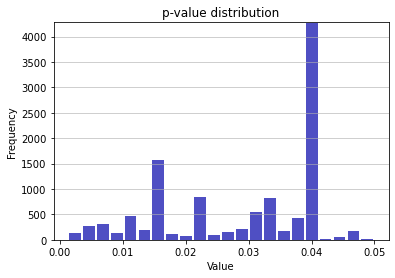

In [62]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=filtered_data.loc[filtered_data['min'] < 0.05]['min'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('p-value distribution')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [9]:
selector = SelectPercentile(f_classif, percentile=5)
selector.fit(data.T, np.array(colLabels))
selector.pvalues_

C:\Users\Pedro\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [   94   165   166   173   174   290   668  1062  1204  1212  1213  1227
  1620  1813  1860  1927  2084  2179  2349  2423  2511  2655  2699  2867
  2898  2911  2913  2941  3147  3196  3197  3198  3216  3217  3249  3356
  3358  3575  3580  3782  3907  4123  4136  4659  4707  5229  5284  5320
  5413  5459  5763  5904  5953  5956  5963  5973  5976  5977  5978  5980
  5981  5982  5984  5987  5990  6060  6064  6106  6418  6545  6697  7028
  7368  7536  7575  7577  7723  7757  7793  7878  7895  8124  8127  8128
  8133  8135  8274  8340  8409  8481  8483  8560  8683  8685  8888  9300
  9424  9442  9648 10017 10031 10034 10159 10346 10348 10614 10616 11136
 11147 11252 11312 11373 11473 11478 11571 11721 11722 11778 11950 11951
 11954 12243 12327 12346 12475 12476 12478 12479 12513 12664 12801 12981
 13177 13370 13421 13456 13507 13524 13606 13698 13929 14033 14074 14184
 14

array([5.43144969e-01, 6.68647947e-09, 9.62238211e-09, ...,
       6.31697738e-42, 3.31218530e-20, 1.69990171e-09])

In [10]:
anova_data = data.copy()
anova_data.insert(len(data.columns), "f-score", selector.pvalues_)

In [13]:
top200 = anova_data.sort_values('f-score', ascending = True).head(200).drop(['f-score'], axis=1)
top500 = anova_data.sort_values('f-score', ascending = True).head(500).drop(['f-score'], axis=1)
top1000 = anova_data.sort_values('f-score', ascending = True).head(1000).drop(['f-score'], axis=1)
top2000 = anova_data.sort_values('f-score', ascending = True).head(2000).drop(['f-score'], axis=1)
top5000 = anova_data.sort_values('f-score', ascending = True).head(5000).drop(['f-score'], axis=1)

In [40]:
top200.to_csv(path + 'data-top200.csv', sep = '\t')
top500.to_csv(path + 'data-top500.csv', sep = '\t')
top1000.to_csv(path + 'data-top1000.csv', sep = '\t')
top2000.to_csv(path + 'data-top2000.csv', sep = '\t')
top5000.to_csv(path + 'data-top5000.csv', sep = '\t')

In [39]:
import enrichmentAnalysis as ea

background_p01 = ea.getEnrichment(list(filtered_data_01.index), 'GO_Biological_Process_2018')

Order of returned results is: Rank, Term name, P-value, Z-score, Combined score, Overlapping genes, Adjusted p-value, Old p-value, Old adjusted p-value


{'GO_Biological_Process_2018': [[1,
   'cytokine-mediated signaling pathway (GO:0019221)',
   5.027969682237796e-27,
   4.4864280566898875,
   271.6746695663376,
   ['CXCL6',
    'CSF3',
    'IFITM1',
    'CD40',
    'CSF2',
    'CSF1',
    'PIK3CD',
    'CXCL1',
    'IL1RAP',
    'CXCL3',
    'TNF',
    'CXCL2',
    'IFIT3',
    'CX3CL1',
    'CXCL5',
    'CRKL',
    'IFIT2',
    'ICAM1',
    'OASL',
    'MT2A',
    'PSMD7',
    'CASP1',
    'TRIM25',
    'IL12B',
    'IL12A',
    'JAK3',
    'B2M',
    'IFNAR2',
    'IL15RA',
    'HLA-B',
    'HLA-C',
    'HLA-F',
    'VAV1',
    'EREG',
    'IL1A',
    'IL23A',
    'OAS2',
    'IL1B',
    'IRF1',
    'PSME1',
    'IFNK',
    'IRF7',
    'PRTN3',
    'LCP1',
    'LTB',
    'CD44',
    'IRF9',
    'BIRC3',
    'SP100',
    'CTF1',
    'PTAFR',
    'EBI3',
    'PDGFB',
    'SOCS2',
    'SOCS3',
    'IRAK2',
    'CCL5',
    'UBC',
    'STAT4',
    'S1PR1',
    'CCL2',
    'PTK2B',
    'SOCS6',
    'GBP2',
    'GBP1',
    'STAT5A',
    '

In [21]:
filtered_data_01 = pd.read_csv(path + 'data-p01.csv', index_col = 0, sep = '\t')